# cochlea: *inner ear models in Python*

In [1]:
%matplotlib inline

In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
import scipy.signal as dsp
import pandas as pd
import matplotlib.pyplot as plt

import cochlea
import cochlea.stats
import thorns as th
import thorns.waves as wv

## Generate a Tone

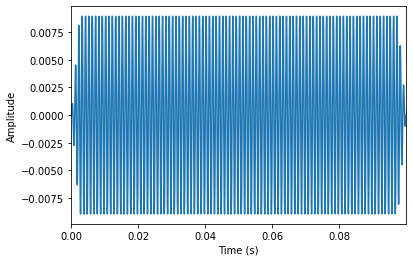

In [2]:
fs = 100e3
cf = 1000
tone = wv.ramped_tone(
    fs=fs,
    freq=1000,
    duration=0.1,
    dbspl=50
)

wv.plot_signal(tone, fs)

## Run the model (responses of 200 cat HSR fibers)

In [3]:
anf_trains = cochlea.run_zilany2014(
    tone,
    fs,
    anf_num=(200,0,0),
    cf=cf,
    seed=0,
    species='cat'
)

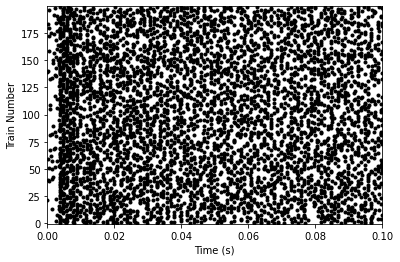

In [4]:
th.plot_raster(anf_trains)

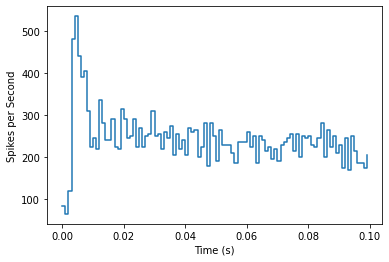

In [5]:
th.plot_psth(anf_trains, 1e-3)

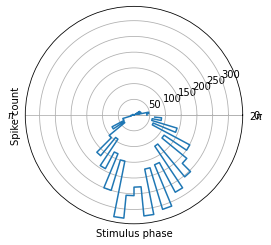

In [6]:
th.plot_period_histogram(anf_trains, 1e3)

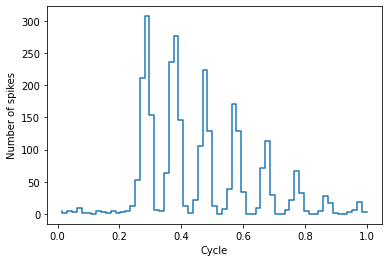

In [28]:
def plot_cycle_hist(spike_train, freq):
    hist, binEdges = th.period_histogram(spike_train, freq)
    plt.step(binEdges[1:]/(2*np.pi), hist)
    plt.xlabel('Cycle')
    plt.ylabel('Number of spikes')

plot_cycle_hist(anf_trains, 100)

## Try schroeder


In [93]:
def schr_wav(f0, c, harLow, harHigh, dur, fs):
    """make a schroeder wave
    input:
        f0: f0 (Hz)
        c: curvature
        harLow: lowest harmonic number
        harHigh: highest harmonic number
        dur: wave duration (second)
        fs: sampling frequency (Hz)
    """
    x = np.arange(0, dur, 1/fs)
    schr = np.zeros_like(x)
    numHarmonics = harHigh - harLow + 1
    
    for i in range(harLow, harHigh+1):
        phase = c * np.pi * i * (i-1) / numHarmonics
        schr = schr + np.cos(2 * np.pi * i * x * f0 + phase)
    
    return schr

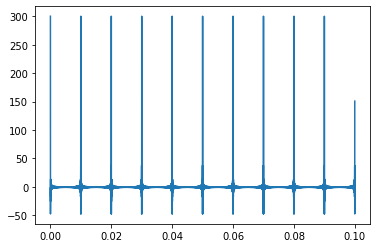

In [94]:
f0 = 100
dur = 0.1
harLow, harHigh = 1, 300
fs = 100e3
c = 0
schr = schr_wav(f0, c, harLow, harHigh, dur, fs)
x = np.arange(0, dur, 1/fs)
plt.plot(x, schr)

In [95]:
schr = cochlea.set_dbspl(schr, 50)

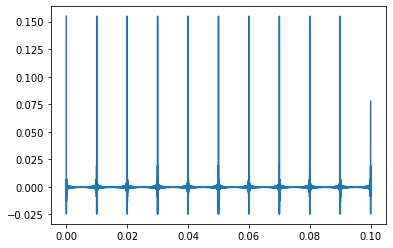

In [96]:
plt.plot(x, schr)

In [97]:
anf_trains = cochlea.run_zilany2014(
    schr,
    fs,
    anf_num=(200,0,0),
    cf=20e3,
    seed=0,
    species='cat'
)

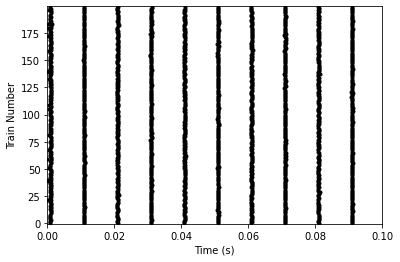

In [98]:
th.plot_raster(anf_trains)

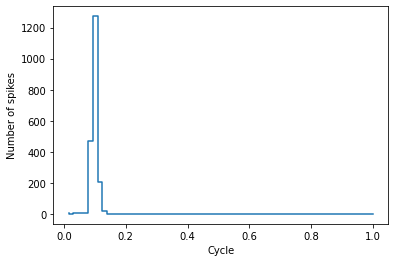

In [99]:
plot_cycle_hist(anf_trains, f0)

In [100]:
anf_trains = cochlea.run_zilany2014(
    schr,
    fs,
    anf_num=(0,0,50),
    cf=(125, 10e3, 100),
    seed=0,
    species='cat'
)

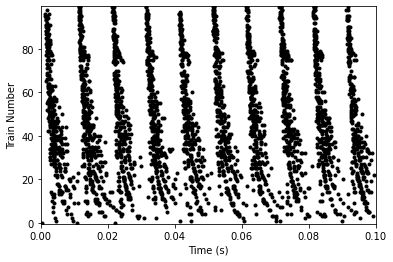

In [101]:
th.plot_raster(th.accumulate(anf_trains))

## Chirp

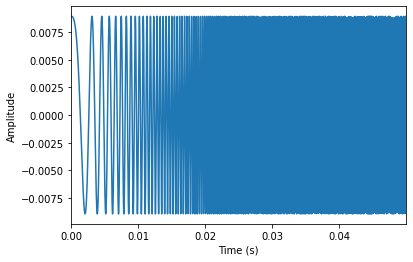

In [5]:
t = np.arange(0, 0.05, 1/fs)
chirp = dsp.chirp(t, 80, t[-1], 8000)
chirp = cochlea.set_dbspl(chirp, 50)

wv.plot_signal(chirp, fs)

## Run Human Ear Model (100 frequency channels, 20 LSR fiber per channel)

In [6]:
anf_trains = cochlea.run_zilany2014(
    chirp,
    fs,
    anf_num=(0,0,50),
    cf=(125, 10e3, 100),
    seed=0,
    species='human'
)

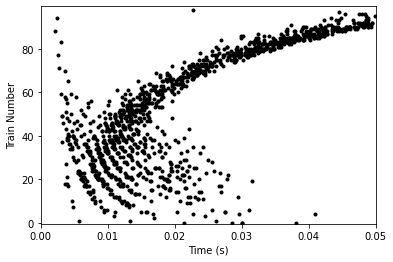

In [7]:
th.plot_raster(th.accumulate(anf_trains))

## Rate-Level Function

In [9]:
rates = cochlea.stats.rate_level.calc_rate_level(
        model=cochlea.run_zilany2014,
        cf=1000,
        model_pars={'fs': 100e3, 'species': 'human'}
)

[##########]  0|22/22  0:00:01.070827  (_run_model)del)


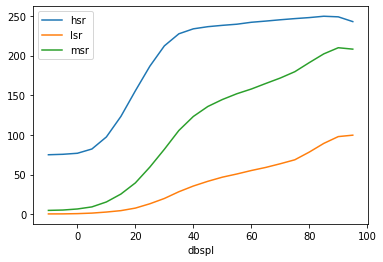

In [10]:
rates.plot()